In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sys 
import os

# TODO: make more pythonic
# this line walks up file directory so rule-vetting is cwd
# Currently this breaks if chunk is run multiple times
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))))
print(os.getcwd())

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


/accounts/grad/wtorous/rule-vetting


In [2]:
import rulevetting.api.viz as viz
from rulevetting.projects.csi_pecarn.eda_dataset import Dataset

In [3]:
full_sample_data = Dataset().get_data(preprocess=True,extract_features=False,impute=False,control_types=['none'])[0]
# use full sample only for demographic trends, random control only for EDA
eda_df = Dataset().get_data(preprocess=True,extract_features=False,impute=False,control_types=['ran'])[0]

 33%|███▎      | 4/12 [00:00<00:00, 37.20it/s]

read all the csvs...
 ['analysisvariables.csv', 'clinicalpresentationfield.csv', 'clinicalpresentationoutside.csv', 'clinicalpresentationsite.csv', 'demographics.csv', 'injuryclassification.csv', 'injurymechanism.csv', 'kappa.csv', 'medicalhistory.csv', 'radiologyoutside.csv', 'radiologyreview.csv', 'radiologysite.csv']


100%|██████████| 12/12 [00:00<00:00, 59.78it/s]
9it [00:00, 73.84it/s]


merging all of the dfs...
IC Removed: 188
Radiology Removed: 19
MOI Removed: 19


/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/helper.py:139: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[base_av_improved] = df[robust_av].copy()
/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/helper.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[base_av_improved][df[base_av+'_binary'].copy()==1] = 0 # condition remains indicated at study site


# no information: 15
['TotalGCSManual_ems', 'GCSEye_ems', 'VerbalGCS_ems', 'MotorGCS_ems', 'TotalGCS_ems', 'TotalGCSManual_outside', 'GCSEye_outside', 'VerbalGCS_outside', 'MotorGCS_outside', 'TotalGCS_outside', 'LocEvalPhysician', 'TotalGCSManual']


/accounts/grad/wtorous/rule-vetting/rulevetting/projects/csi_pecarn/eda_dataset.py:498: UserWarning: Persisting input arguments took 2.08s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  data = cache(self.preprocess_data)(data, datasets, **default_kwargs['preprocess_data'])


split_data kwargs {'control_types': ['none']}
split_data kwargs {'control_types': ['ran']}


In [4]:
print(eda_df.shape)

(944, 305)


In [5]:
eda_df.shape

(944, 305)

In [6]:
outcome_def = 'csi_injury'

In [7]:
eda_df = eda_df.apply(pd.to_numeric, errors='ignore')

In [8]:
eda_numeric = eda_df.select_dtypes([np.number])
cat_eda_data = eda_df.select_dtypes([np.object])

# get list of columns with only two recorded outcomes
binary_columns = eda_numeric.columns[eda_numeric.nunique()==2]
binary_eda_data = eda_df.loc[:,binary_columns].copy() 

cont_columns = eda_numeric.columns[eda_numeric.nunique()!=2]
cont_eda_data = eda_df.loc[:,cont_columns].copy() 

cat_columns = cat_eda_data.columns

In [9]:
# outcome indicator is double counted
print(eda_df.shape)
print(binary_eda_data.shape)
print(cont_eda_data.shape)
print(cat_eda_data.shape)

(944, 305)
(944, 274)
(944, 14)
(944, 17)


In [10]:
print(list(binary_eda_data.columns))

['AlteredMentalStatus', 'LOC', 'FocalNeuroFindings', 'PainNeck', 'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head', 'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk', 'Predisposed', 'HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop', 'PtTenderOther_ems', 'OtherInjuriesExtr_ems', 'MinorInjuriesPel_ems', 'MedsRecdOth_outside', 'PtTenderNeckLevelOther_outside', 'MinorInjuriesPelvis_outside', 'CervicalSpineImmobilization', 'CervicalSpineIntervCC', 'CervicalSpineIntervRLB', 'CervicalSpineIntervOther', 'MedsRecdAna', 'MedsRecdGlu', 'MedsRecdPar', 'MedsRecdSed', 'MedsRecdOR', 'PtCompPainHead', 'PtCompPainFace', 'PtCompPainNeck', 'PtCompPainChest', 'PtCompPainBack', 'PtCompPainFlank', 'PtCompPainAbd', 'PtCompPainPelvis', 'PtCompPainExt', 'PtTenderHead', 'PtTenderFace', 'PtTenderNeck', 'PtTenderNeckLevel', 'PtTenderNeckLevelC1', 'PtTenderNeckLevelC2', 'PtTenderNeckLevelC3', 'PtTenderNeckLev

In [11]:
print(list(cont_eda_data.columns))

['GCSEye', 'VerbalGCS', 'MotorGCS', 'TotalGCS', 'OtherInjuriesFlank', 'AgeInYears', 'FallDownStairs', 'BodyAsAWhole2', 'BodyAsAWhole3', 'HematologicLymphatic1', 'AVPUMental_ems_AVPU_OB', 'AVPUMental_outside_AVPU_OB', 'AVPUMental_AVPU_C', 'MedsRecdSed_improved']


In [12]:
print(list(cat_eda_data.columns))

['FieldDocumentation_ems', 'PatientsPosition_ems', 'EDDocumentation_outside', 'ModeArrivalOutsideHospital_outside', 'OutsideEDDisposition_outside', 'EDDisposition', 'OutcomeStudySite_posthoc', 'OutcomeStudySiteNeuro_posthoc', 'OutcomeStudySiteMobility_posthoc', 'OutcomeStudySiteBowel_posthoc', 'OutcomeStudySiteUrine_posthoc', 'Race_posthoc', 'Ethnicity_posthoc', 'PayorType_posthoc', 'PayorTypeCI_posthoc', 'PayorTypeMA_posthoc', 'OtherPredisposingCondition']


# Demographic EDA

In [13]:
demographic_df = full_sample_data[['Race_posthoc', 'PayorType_posthoc','Ethnicity_posthoc','Male','AgeInYears']].copy()

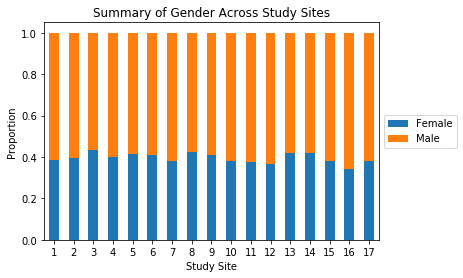

In [14]:
gender_df = demographic_df.replace([0,1],['Female','Male']).groupby('site')['Male'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Gender Across Study Sites')
gender_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

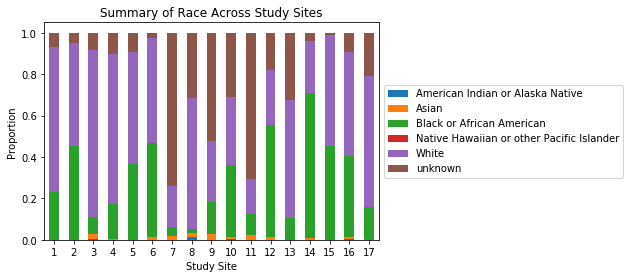

In [15]:
race_map = {
        'AI': 'American Indian or Alaska Native',
        'A': 'Asian',
        'B': 'Black or African American',
        'PI': 'Native Hawaiian or other Pacific Islander',
        'W': 'White',
        'ND': 'unknown',  # stated as unknown
        'O': 'unknown'  # other
    }

race_df = demographic_df['Race_posthoc'].map(race_map).groupby('site').value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Race Across Study Sites')
race_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

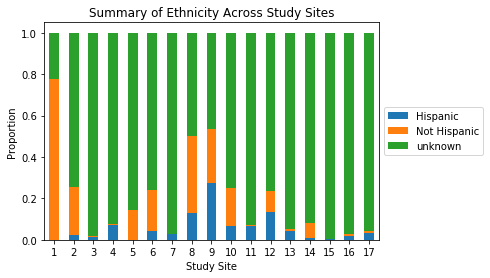

In [16]:
ethnicity_map = {
    'H':'Hispanic',
    'NH': 'Not Hispanic',
    'ND': 'unknown',
    'O': 'unknown'
    }

ethnicity_df = demographic_df['Ethnicity_posthoc'].map(ethnicity_map).groupby('site').value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Ethnicity Across Study Sites')
ethnicity_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

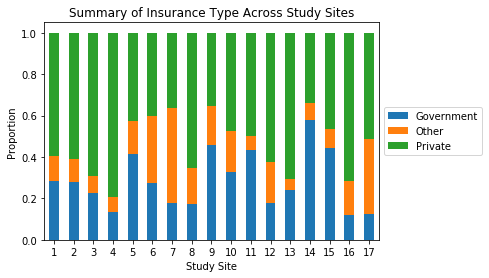

In [17]:
payor_map = {
    'CH':'Government',
    'OG':'Government',
    'WC':'Government',
    'MA':'Government',
    'CI':'Private',
    'SU':'Other',
    'ND':'Other'
    }

payor_df = demographic_df['PayorType_posthoc'].map(payor_map).groupby('site').value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Insurance Type Across Study Sites')
payor_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")
plt.show()

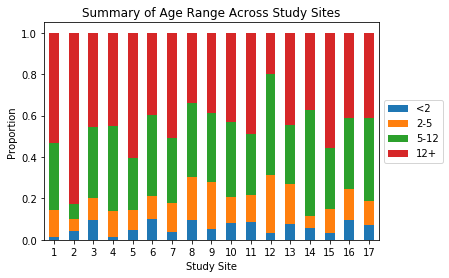

In [18]:
age_df = demographic_df.reset_index()[['site','AgeInYears']]


bins = [0, 2, 5, 12, np.inf]
names = ['<2', '2-5', '5-12', '12+']

age_df.loc[:,['AgeBin']] = pd.cut(age_df.loc[:,'AgeInYears'], bins, labels=names)

age_range_df = age_df.groupby('site')['AgeBin'].value_counts(normalize=True)

fig = plt.figure()
plt.title('Summary of Age Range Across Study Sites')
age_range_df.unstack().plot(kind='bar', stacked=True,ax=fig.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation = 0)
plt.xlabel("Study Site")
plt.ylabel("Proportion")

plt.show()


# Exploration of Categorical Variables

In [19]:
cat_col = list(cat_eda_data.columns)

for column in cat_col:
    char_column = cat_eda_data[column] # select column
    values = pd.unique(char_column)
    print(column,values,len(values))

FieldDocumentation_ems ['OTR' 'EMS' 'NR' nan] 4
PatientsPosition_ems [nan 'L' 'IDEMS' 'S' 'ND' 'W' 'PA'] 7
EDDocumentation_outside ['SITE' 'ED' 'EDU' nan] 4
ModeArrivalOutsideHospital_outside [nan 'EMS' 'ND' 'NEMS'] 4
OutsideEDDisposition_outside [nan 'T' 'OR' 'ICU' 'H' 'IPT'] 6
EDDisposition ['HOME' 'GEN' 'ICU' 'TRANSFER' 'OR' 'SHORT' 'DEATH'] 7
OutcomeStudySite_posthoc ['N' 'PND' 'DTH'] 3
OutcomeStudySiteNeuro_posthoc [nan 'SD' 'NR' 'MD' 'PVS'] 5
OutcomeStudySiteMobility_posthoc [nan 'WD' 'I' 'N' 'DA'] 5
OutcomeStudySiteBowel_posthoc [nan 'N' 'I'] 3
OutcomeStudySiteUrine_posthoc [nan 'N' 'C' 'I'] 4
Race_posthoc ['W' 'ND' 'B' 'O' 'A' 'AI'] 6
Ethnicity_posthoc ['NH' 'ND' 'H' 'O'] 4
PayorType_posthoc ['CI' 'MA' 'ND' 'OG' 'SU' 'CH'] 6
PayorTypeCI_posthoc ['ND' 'MC' nan 'FEE'] 4
PayorTypeMA_posthoc [nan 'MC' 'ND' 'FEE'] 4
OtherPredisposingCondition [nan 'Cervical spinal stenosis' 'ESRD'
 'Congenital anomaly of cervical vertebrae' 'Achondrodysplasia'
 'Arnold Chiari Malformation' 'C-spine 

# Exploration of GCS

In [20]:
gcs_vars = [col_name for col_name in cont_eda_data if 'gcs' in col_name.lower()]
gcs_data = cont_eda_data[gcs_vars]
gcs_na = pd.isna(gcs_data)

In [21]:
#weirdo_index = gcs_na[(gcs_na['TotalGCS']==True).index
#eda_df.loc[weirdo_index].shape

In [22]:
gcs_corrs = gcs_data.corr(method='spearman')
gcs_na_corrs = gcs_na.corr(method='spearman')
print(gcs_na_corrs)

           GCSEye  VerbalGCS  MotorGCS  TotalGCS
GCSEye        1.0        1.0       1.0       1.0
VerbalGCS     1.0        1.0       1.0       1.0
MotorGCS      1.0        1.0       1.0       1.0
TotalGCS      1.0        1.0       1.0       1.0


Text(0.5, 0.98, 'Spearman Correlation of GCS at Study Site')

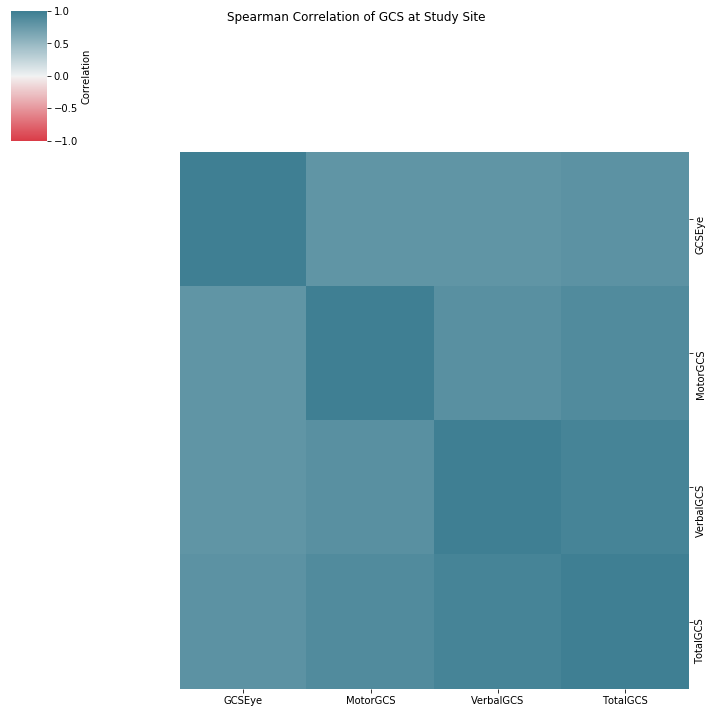

In [23]:
cont_corrmap = sns.clustermap(gcs_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)
plt.suptitle("Spearman Correlation of GCS at Study Site")

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/seaborn/matrix.py:709: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  ax.set_xlim(0, max_dependent_coord * 1.05)
/accounts/grad/wtorous/.local/lib/python3.7/site-packages/seaborn/matrix.py:717: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0.0
  ax.set_ylim(0, max_dependent_coord * 1.05)


Text(0.5, 0.98, 'Spearman Correlation of GCS Missingness at Study Site')

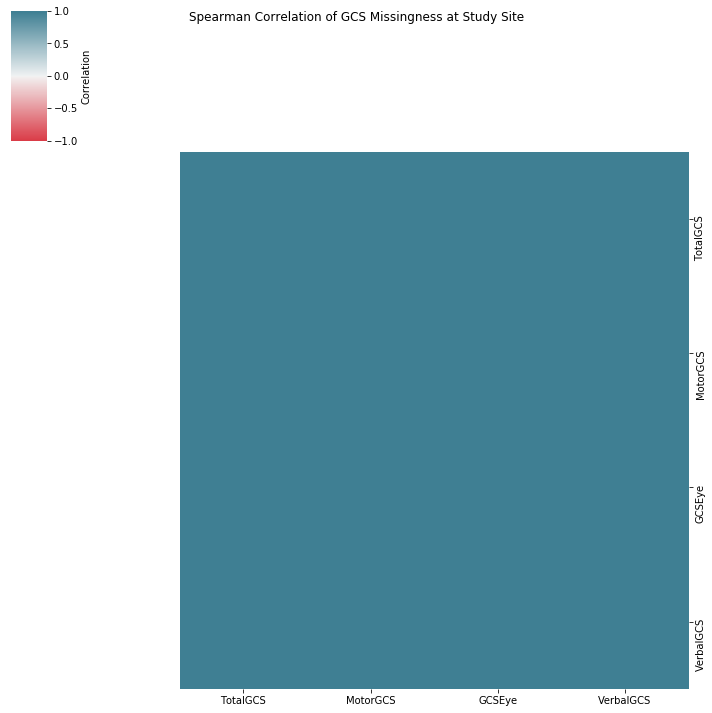

In [24]:
gcs_corrs = gcs_data.corr(method='spearman')
cont_corrmap = sns.clustermap(gcs_na_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)
plt.suptitle("Spearman Correlation of GCS Missingness at Study Site")

# Missingness EDA

In [25]:
binary_missing_data = pd.isna(binary_eda_data)

In [26]:
# get percent missing by column
pd.set_option("display.max_rows", None, "display.max_columns", None)
#print("Spearman Correlation of Binary Missingness")
#print("All Covariates:")
missing_frac = (binary_missing_data.sum() / eda_df.shape[0]) * 100
#print(missing_frac.sort_values(ascending=False)[:])

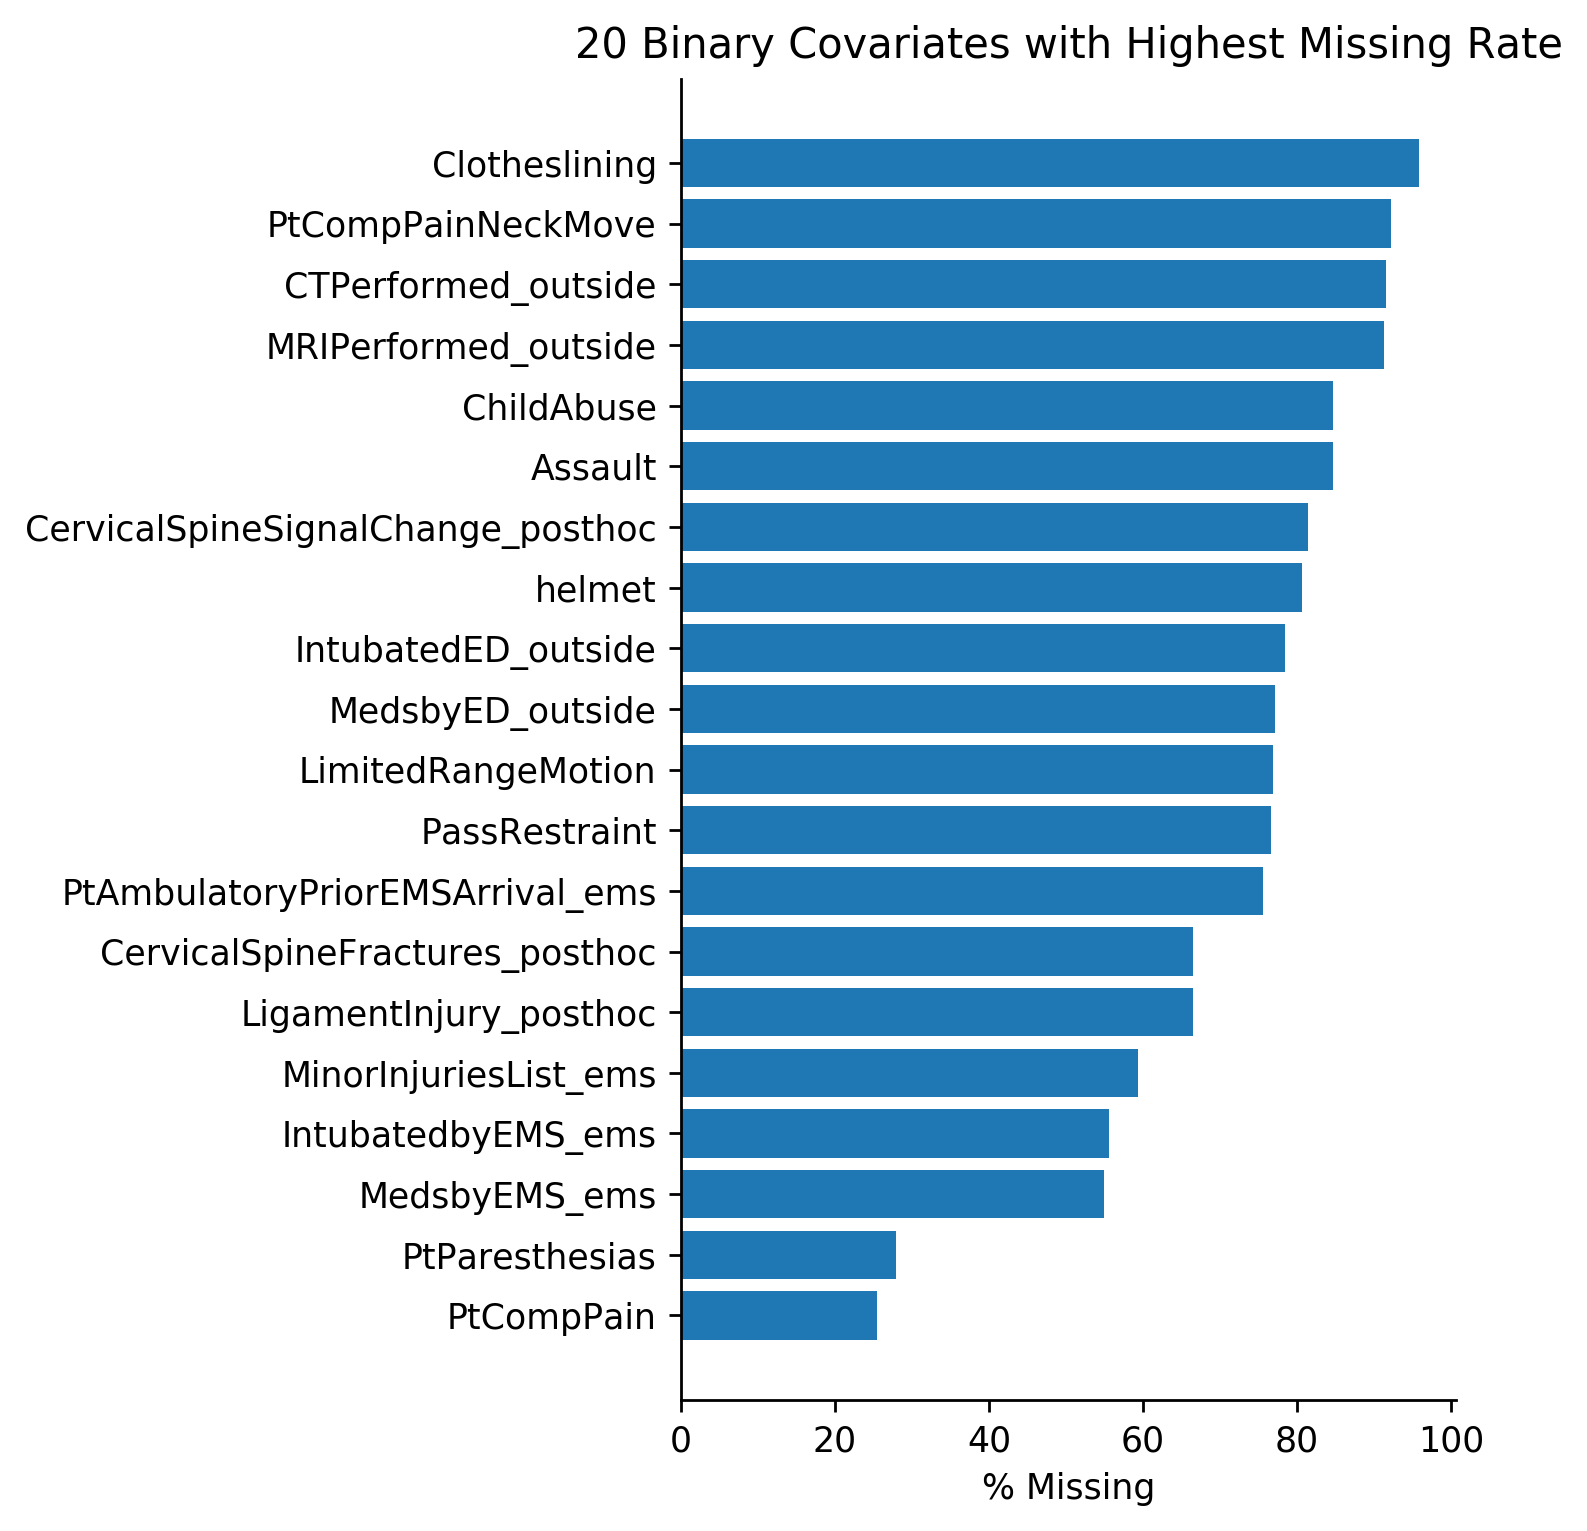

In [27]:
plt.figure(dpi=250, figsize=(4, 7))
vals = missing_frac
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-20:], vals[args][-20:])
plt.xlabel('% Missing')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("20 Binary Covariates with Highest Missing Rate")
plt.show()

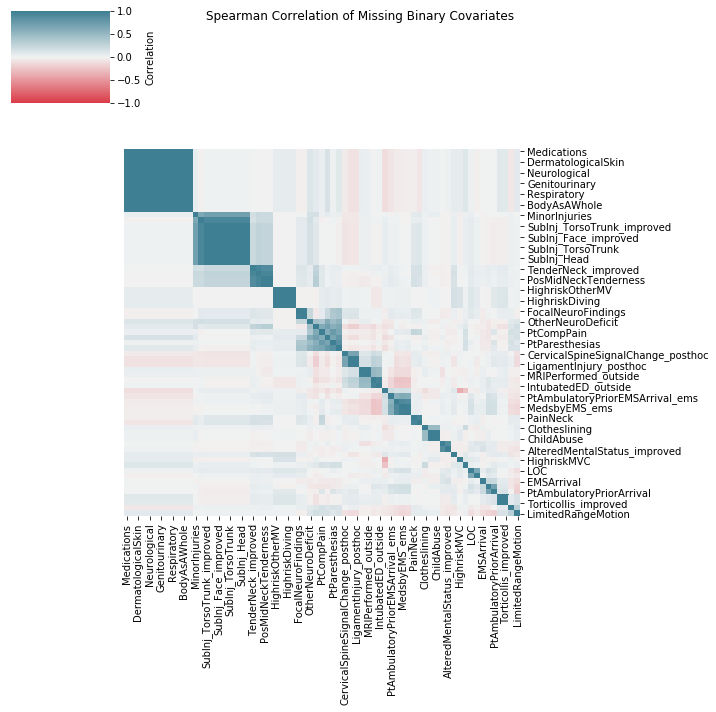

In [28]:
missing_columns = missing_frac[missing_frac!=0]
binary_missing_bools = binary_eda_data[missing_columns.index].isna()
binary_missing_corrs = binary_missing_bools.corr(method='spearman')

corrmap = sns.clustermap(binary_missing_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.suptitle("Spearman Correlation of Missing Binary Covariates")
plt.tight_layout()


In [29]:
binary_missing_corrs_k = binary_missing_bools.corr(method='kendall')
delta = binary_missing_corrs_k - binary_missing_corrs
print(np.linalg.norm(delta,ord='fro'))

2.0113943788512747e-15


/accounts/grad/wtorous/.local/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Spearman Correlation of Binary Data with NA D')

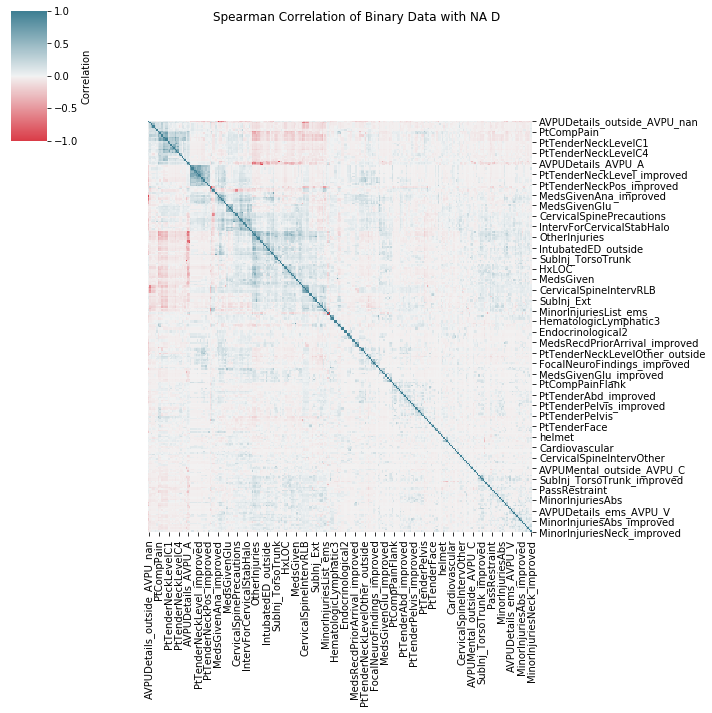

In [30]:
binary_missing_data_zero_imputed = binary_eda_data.fillna(0)
binary_corrs_zero_imputation = binary_missing_data_zero_imputed.corr(method='spearman')
corrmap = sns.clustermap(binary_corrs_zero_imputation, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.suptitle("Spearman Correlation of Binary Data with NA D")

Text(0.5, 0.98, 'Spearman Correlation of Zero Imputed Binary Data')

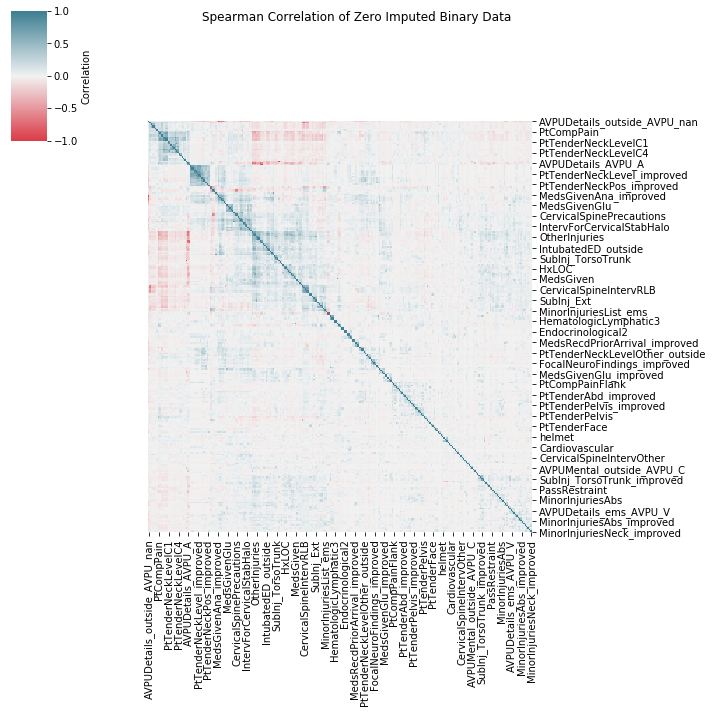

In [31]:
binary_missing_data_zero_imputed = binary_eda_data.fillna(0)
binary_corrs_zero_imputation = binary_missing_data_zero_imputed.corr(method='spearman')
corrmap = sns.clustermap(binary_corrs_zero_imputation, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.suptitle("Spearman Correlation of Zero Imputed Binary Data")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/accounts/grad/wtorous/.local/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Spearman Correlation of Likelihood Imputed Binary Data')

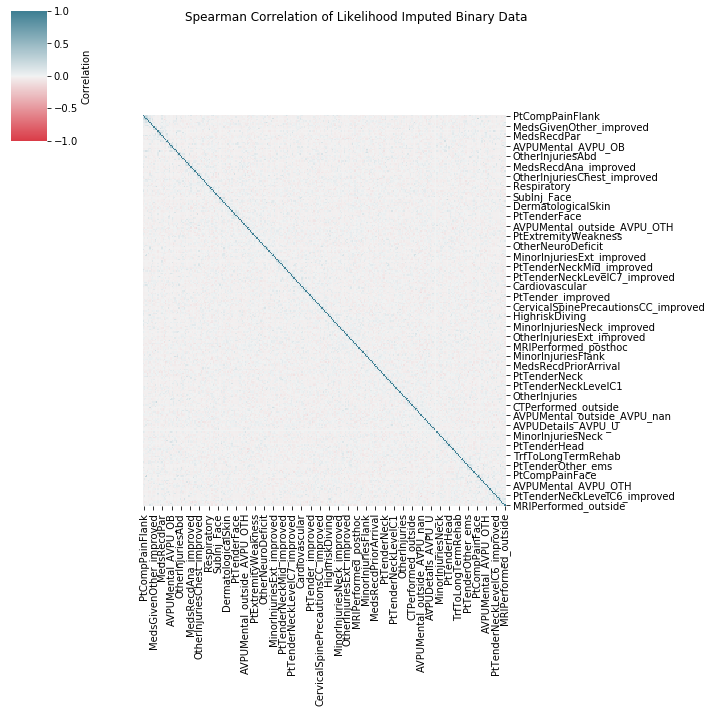

In [32]:
binary_eda_data_copy = binary_eda_data.copy()
observed_mean_values = binary_eda_data_copy[binary_eda_data_copy.columns].mean(axis=0,skipna=True)
random_values = pd.DataFrame([np.random.binomial(1,p=observed_mean_values) for i in range (binary_eda_data_copy.shape[0])],\
                                    columns=binary_eda_data_copy.columns, index=binary_eda_data_copy.index)
binary_eda_data_copy.update(random_values)
print(binary_eda_data_copy)
binary_corrs_mean_imputation = binary_eda_data_copy.corr(method='spearman')
binary_corrs_mean_imputation = binary_corrs_mean_imputation.fillna(0)

corrmap = sns.clustermap(binary_corrs_mean_imputation, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
corrmap.ax_row_dendrogram.set_visible(False)
corrmap.ax_col_dendrogram.set_visible(False)
plt.suptitle("Spearman Correlation of Likelihood Imputed Binary Data")


# Impute GCS and AVPU

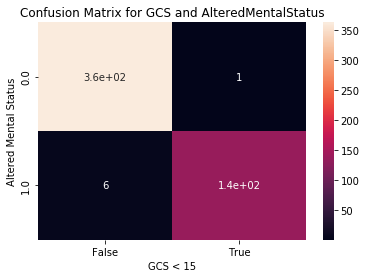

In [33]:
gcs_imputation_data = eda_df[['AlteredMentalStatus','GCSEye', 'VerbalGCS', 'MotorGCS', 'TotalGCS','csi_injury']]
gcs_imputation_data['GCSna'] = pd.isna(gcs_imputation_data['TotalGCS'])
gcs_imputation_data['AMSna'] = pd.isna(gcs_imputation_data['AlteredMentalStatus'])
gcs_imputation_data['GCSnot15'] = gcs_imputation_data['TotalGCS'] < 15

observed_instances = gcs_imputation_data[(gcs_imputation_data['GCSna']==0)&(gcs_imputation_data['AMSna']==0)]

confusion_matrix = pd.crosstab(observed_instances['AlteredMentalStatus'], observed_instances['GCSnot15'], rownames=['Altered Mental Status'], colnames=['GCS < 15'])
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for GCS and AlteredMentalStatus")
plt.show()

In [34]:
imputation_test = gcs_imputation_data[(gcs_imputation_data['GCSna']==0)&(gcs_imputation_data['AlteredMentalStatus']==1)]

print(gcs_imputation_data['GCSEye'].mean())
print(gcs_imputation_data['GCSEye'].median())

print(gcs_imputation_data['VerbalGCS'].mean())
print(gcs_imputation_data['VerbalGCS'].median())

print(gcs_imputation_data['MotorGCS'].mean())
print(gcs_imputation_data['MotorGCS'].median())



3.5404339250493098
4.0
4.26232741617357
5.0
5.274161735700197
6.0


(18, 9)


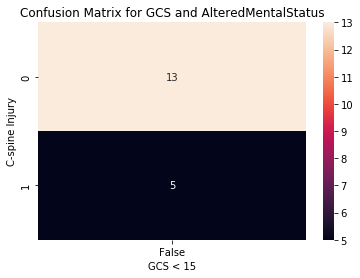

In [35]:
still_missing = gcs_imputation_data[(gcs_imputation_data['GCSna']==1)&(gcs_imputation_data['AMSna']==1)]
print(still_missing.shape)
confusion_matrix = pd.crosstab(still_missing['csi_injury'], still_missing['GCSnot15'], rownames=['C-spine Injury'], colnames=['GCS < 15'])
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for GCS and AlteredMentalStatus")
plt.show()

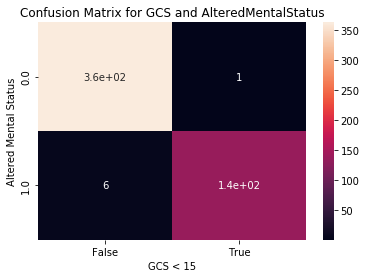

In [36]:
avpu_imputation_data = eda_df[['AlteredMentalStatus','TotalGCS']]
gcs_imputation_data['GCSna'] = pd.isna(gcs_imputation_data['TotalGCS'])
gcs_imputation_data['AMSna'] = pd.isna(gcs_imputation_data['AlteredMentalStatus'])

observed_instances = gcs_imputation_data[(gcs_imputation_data['GCSna']==0)&(gcs_imputation_data['AMSna']==0)]
observed_instances['GCSnot15'] = observed_instances['TotalGCS'] < 15

confusion_matrix = pd.crosstab(observed_instances['AlteredMentalStatus'], observed_instances['GCSnot15'], rownames=['Altered Mental Status'], colnames=['GCS < 15'])
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for GCS and AlteredMentalStatus")
plt.show()

In [37]:
avpu_col = [col_name for col_name in eda_df.columns if 'avpu' in col_name.lower()]

In [38]:
eda_df[avpu_col].describe()

,AVPUDetails_ems_AVPU_A,AVPUDetails_ems_AVPU_P,AVPUDetails_ems_AVPU_U,AVPUDetails_ems_AVPU_V,AVPUDetails_ems_AVPU_nan,AVPUMental_ems_AVPU_OB,AVPUMental_ems_AVPU_OTH,AVPUMental_ems_AVPU_U,AVPUMental_ems_AVPU_nan,AVPUDetails_outside_AVPU_A,AVPUDetails_outside_AVPU_P,AVPUDetails_outside_AVPU_U,AVPUDetails_outside_AVPU_V,AVPUDetails_outside_AVPU_nan,AVPUMental_outside_AVPU_C,AVPUMental_outside_AVPU_OB,AVPUMental_outside_AVPU_OTH,AVPUMental_outside_AVPU_U,AVPUMental_outside_AVPU_nan,AVPUDetails_AVPU_A,AVPUDetails_AVPU_P,AVPUDetails_AVPU_U,AVPUDetails_AVPU_V,AVPUDetails_AVPU_nan,AVPUMental_AVPU_C,AVPUMental_AVPU_OB,AVPUMental_AVPU_OTH,AVPUMental_AVPU_U,AVPUMental_AVPU_nan
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.0,944.00000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.0,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.0,944.000000,944.000000,944.000000,944.000000
mean,0.298729,0.015890,0.024364,0.011653,0.649364,0.0,0.03072,0.003178,0.966102,0.137712,0.004237,0.011653,0.003178,0.843220,0.002119,0.0,0.023305,0.003178,0.971398,0.764831,0.022246,0.042373,0.021186,0.149364,0.0,0.003178,0.081568,0.007415,0.907839
std,0.457943,0.125116,0.154259,0.107373,0.477422,0.0,0.17265,0.056314,0.181063,0.344780,0.064991,0.107373,0.056314,0.363786,0.046004,0.0,0.150951,0.056314,0.166773,0.424330,0.147560,0.201545,0.144082,0.356636,0.0,0.056314,0.273850,0.085837,0.289406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [39]:
binary_imputed_data = binary_eda_data.fillna(0)
print(binary_eda_data.shape, binary_imputed_data.shape)
binary_corrs = binary_imputed_data.corr(method='spearman')
cont_corrs = cont_eda_data.corr(method='spearman')

print(binary_imputed_data.columns)

(944, 274) (944, 274)
Index(['AlteredMentalStatus', 'LOC', 'FocalNeuroFindings', 'PainNeck',
       'PosMidNeckTenderness', 'TenderNeck', 'Torticollis', 'SubInj_Head',
       'SubInj_Face', 'SubInj_Ext',
       ...
       'CervicalSpinePrecautionsCC_improved', 'PtTenderExt_improved',
       'PtTenderNeckLat_improved', 'PtTenderBack_improved',
       'PtCompPainChest_improved', 'OtherInjuriesAbd_improved',
       'PtTenderChest_improved', 'PtCompPainAbd_improved',
       'PtTenderNeckLevelC5_improved', 'OtherInjuriesExt_improved'],
      dtype='object', length=274)


/accounts/grad/wtorous/.local/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'Spearman Correlation of Binary Covariates with Mean Imputation')

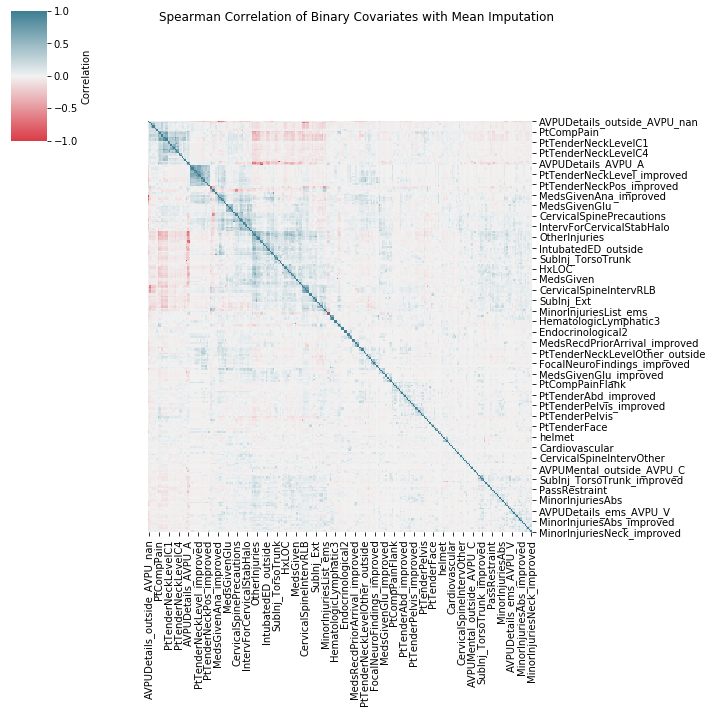

In [40]:
binary_corrmap = sns.clustermap(binary_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
binary_corrmap.ax_row_dendrogram.set_visible(False)
binary_corrmap.ax_col_dendrogram.set_visible(False)
binary_corrmap.fig.suptitle("Spearman Correlation of Binary Covariates with Mean Imputation")

ValueError: The condensed distance matrix must contain only finite values.

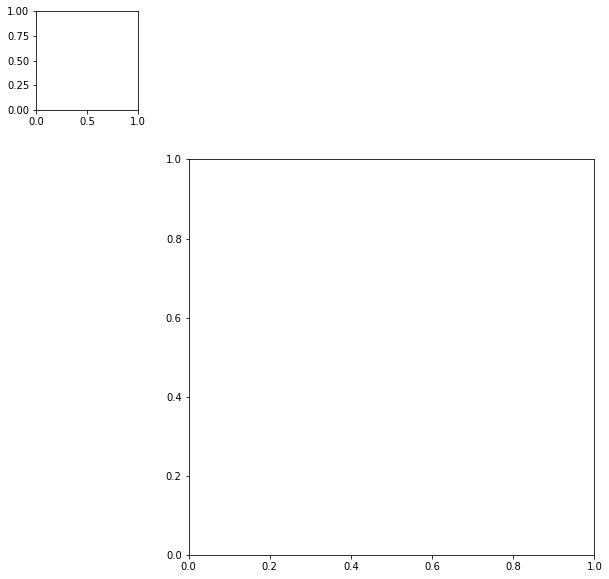

In [41]:
cont_corrmap = sns.clustermap(cont_corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
cont_corrmap.ax_row_dendrogram.set_visible(False)
cont_corrmap.ax_col_dendrogram.set_visible(False)

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
#vals = binary_corrs[outcome_def]
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-20:], vals[args][-20:])
plt.xlabel('Correlation w/ GCS Missing')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Top 20 Correlations")
plt.show()

In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_corrs['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [ ]:
list(binary_imputed_data.columns)

In [ ]:
cc_data = binary_imputed_data#[(binary_imputed_data['NonVerbal']==1)]
#confusion_matrix = pd.crosstab(cc_data['HighriskDiving'], cc_data['IntervForCervicalStabSurgical'], rownames=['CSI Injury'], colnames=['Neck Pain'])
#confusion_matrix = pd.crosstab(cc_data['csi_injury'], cc_data['PtTenderNeck'], rownames=['CSI Injury'], colnames=['Neck Pain'])

sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix for Injury and GCS with AlteredMentalStatus")
plt.show()


In [ ]:
intervention_types = [col_name for col_name in binary_imputed_data if 'IntervFor' in col_name]
injury_types = [col_name for col_name in binary_imputed_data if 'Highrisk' in col_name]

intervention_data = binary_imputed_data[injury_types+intervention_types]

In [ ]:
for injury in injury_types:
    intervention_information = intervention_data.drop([i for i in injury_types if i is not injury],axis=1)
    summary_data = intervention_information.groupby([injury]).mean()
    print(summary_data)

# Associations with Outcome of Interest

In [ ]:
binary_imputed_data = binary_eda_data.fillna(0)
posthoc_outcomes = [col for col in binary_imputed_data.columns if (('posthoc' in col.lower()) | ('interv' in col.lower()) |\
                                                                  ('precautions' in col.lower()) | ('medsrecd' in col.lower()) |\
                                                                  ('improved' in col.lower()) | ('ss' in col.lower())|\
                                                                  ('rehab' in col.lower()) | ('medsgiven' in col.lower()))]
binary_imputed_covar = binary_imputed_data.drop(posthoc_outcomes,axis=1)
binary_imputed_corr = binary_imputed_covar.corr(method='spearman')


In [ ]:
plt.figure(dpi=250, figsize=(4, 7))
vals = binary_imputed_corr['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-26:-1], vals[args][-26:-1])
plt.xlabel('Correlation with Outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Binary Covariates Most Correlated with C-spine Injury")
plt.show()

plt.figure(dpi=250, figsize=(4, 7))
vals = binary_imputed_corr['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation with Outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Binary Covariates Most Correlated with C-spine Injury")
plt.show()

In [ ]:
non_ss_outcomes = [col for col in binary_imputed_covar.columns if (('outside' in col.lower())\
                                                     | ('received' in col.lower()) | ('form' in col.lower()) | ('dx' in col.lower()) | ('ems' in col.lower()))]
binary_imputed_covar_ss = binary_imputed_covar.drop(non_ss_outcomes,axis=1)
binary_imputed_corr_ss = binary_imputed_covar_ss.corr(method='spearman')

plt.figure(dpi=250, figsize=(4, 7))
vals = binary_imputed_corr_ss['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[-26:-1], vals[args][-26:-1])
plt.xlabel('Correlation with Outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Binary Covariates Most Correlated with C-spine Injury at Study Site")
plt.show()

plt.figure(dpi=250, figsize=(4, 7))
vals = binary_imputed_corr_ss['csi_injury']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:25], vals[args][:25])
plt.xlabel('Correlation with Outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Binary Covariates Least Correlated with C-spine Injury at Study Site")
plt.show()


